# **package_LAB**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import package_LAB
from package_LAB import LL_RT
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
from importlib import reload
package_LAB = reload(package_LAB)

## LL_RT()

In [4]:
help(LL_RT)

Help on function LL_RT in module package_LAB:

LL_RT(MV, Kp, TLead, TLag, Ts, PV, PVInit=0, method='EBD')
    The function "FO_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :TLead: Lead time constant [s]
    :TLag: Lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "FO_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0.0, 100.0)

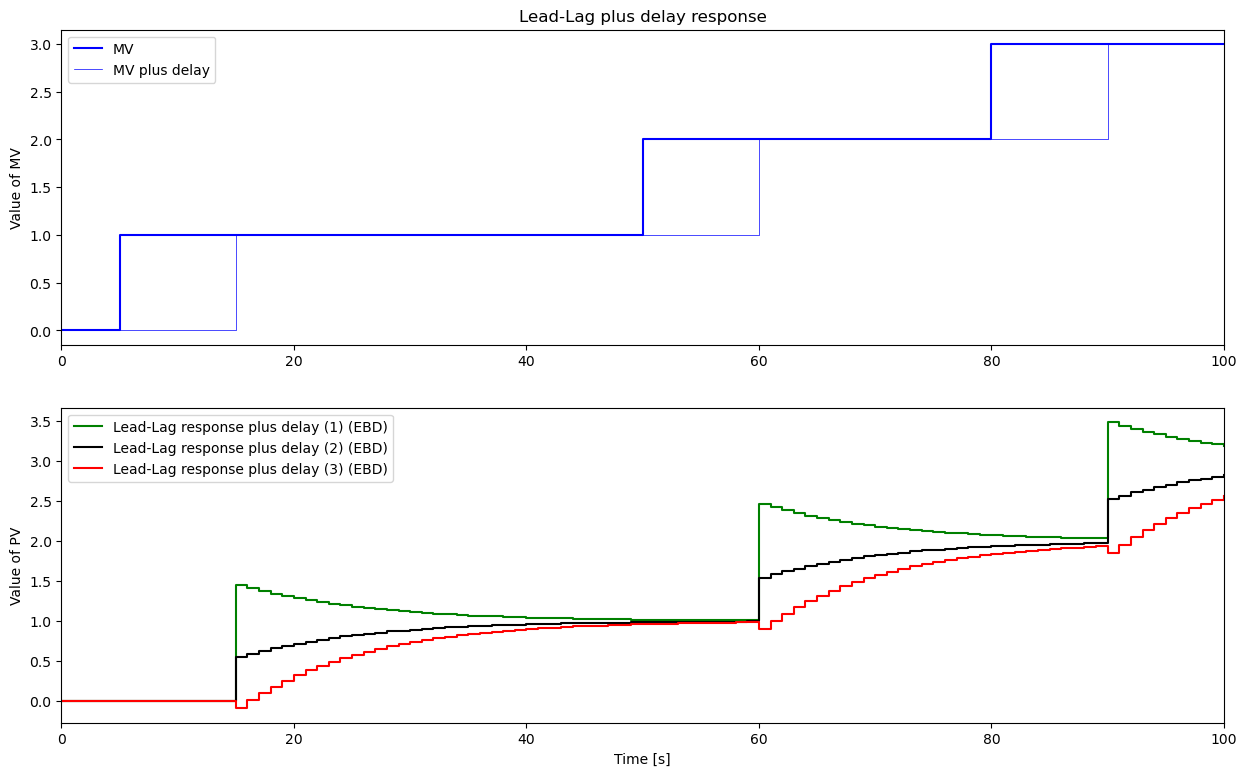

In [5]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD_1 = []
PV_EBD_2 = []
PV_EBD_3 = []
# PV_EFD_1 = []
# PV_TRAP_1 = []

# Parameters
Kp = 1
Tlead_1 = 15
Tlead_2 = 5
Tlead_3 = -2
Tlag = 10
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LL_RT(MVDelay, Kp, Tlead_1, Tlag, Ts, PV_EBD_1)
    LL_RT(MVDelay, Kp, Tlead_2, Tlag, Ts, PV_EBD_2)
    LL_RT(MVDelay, Kp, Tlead_3, Tlag, Ts, PV_EBD_3)
    #LL_RT(MVDelay, Kp, Tlead, Tlag, Ts, PV_EFD, 0, 'EFD')
    #LL_RT(MVDelay, Kp, Tlead, Tlag, Ts, PV_TRAP, 0, 'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('Lead-Lag plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD_1,'g-',label='Lead-Lag response plus delay (1) (EBD)',where='post')
plt.step(t,PV_EBD_2,'k-',label='Lead-Lag response plus delay (2) (EBD)',where='post')
plt.step(t,PV_EBD_3,'r-',label='Lead-Lag response plus delay (3) (EBD)',where='post')
#plt.step(t,PV_EFD,'lime',label='Lead-Lag response plus delay (EFD)',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='Lead-Lag response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])